## Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
# import SVM
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
# import encoding
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA


In [2]:
df=pd.read_csv('../input/airlines-customer-satisfaction/Invistico_Airline.csv')


In [3]:
df=df.sample(n=100000,random_state=1)



In [4]:
df.head()
# print all the unique values in the dataframe
for i in range(len(df.columns)):
    print(df.columns[i],df.iloc[:,i].unique())




satisfaction ['dissatisfied' 'satisfied']
Gender ['Male' 'Female']
Customer Type ['Loyal Customer' 'disloyal Customer']
Age [49 37 43 47 56 33 57 67 41 45 29 26 51 16 21 32 14 61 59 34 50 20 68 44
 42 36 31 48 55 39 53 15 62 25 70 60 19 18 52 27 23 54 24 66 30  7 28 69
 22 64 10 40 38 13 35  9 58 12 46 11 65 17 79 85 63  8 71 75 77 72 80 76
 78 74 73]
Type of Travel ['Personal Travel' 'Business travel']
Class ['Eco' 'Business' 'Eco Plus']
Flight Distance [2501 1624 1755 ... 4422 5386 5302]
Seat comfort [3 4 0 1 2 5]
Departure/Arrival time convenient [4 0 3 5 2 1]
Food and drink [2 4 0 1 3 5]
Gate location [3 2 1 4 5 0]
Inflight wifi service [5 2 1 3 4 0]
Inflight entertainment [2 4 1 5 3 0]
Online support [5 2 3 4 1 0]
Ease of Online booking [5 2 1 3 4 0]
On-board service [4 1 5 2 3 0]
Leg room service [4 1 3 5 2 0]
Baggage handling [4 1 3 5 2]
Checkin service [3 5 1 2 4 0]
Cleanliness [4 1 5 3 2 0]
Online boarding [5 2 1 3 4 0]
Departure Delay in Minutes [   0   12   15   16  192   89

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 24303 to 25405
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       100000 non-null  object 
 1   Gender                             100000 non-null  object 
 2   Customer Type                      100000 non-null  object 
 3   Age                                100000 non-null  int64  
 4   Type of Travel                     100000 non-null  object 
 5   Class                              100000 non-null  object 
 6   Flight Distance                    100000 non-null  int64  
 7   Seat comfort                       100000 non-null  int64  
 8   Departure/Arrival time convenient  100000 non-null  int64  
 9   Food and drink                     100000 non-null  int64  
 10  Gate location                      100000 non-null  int64  
 11  Inflight wifi service              1

In [6]:
df.shape

(100000, 23)

In [7]:
df.isna().sum()

satisfaction                           0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             299
dtype: int64

EDA


In [8]:
df.columns

Index(['satisfaction', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


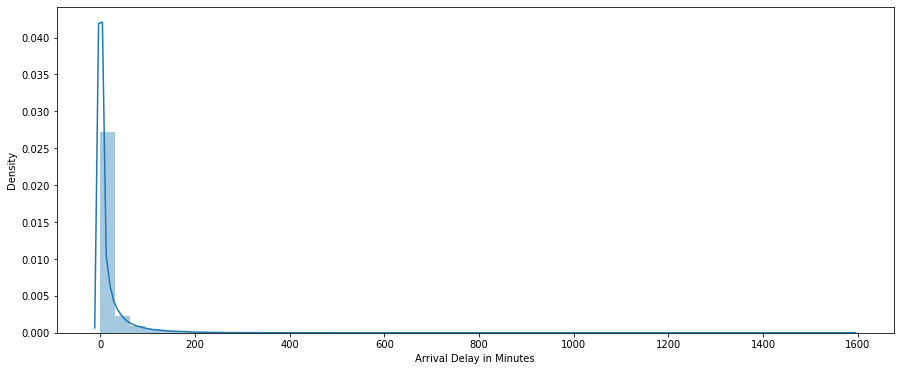

In [9]:
fig = plt.figure(figsize=(15,6))
sns.distplot(df['Arrival Delay in Minutes']); 
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


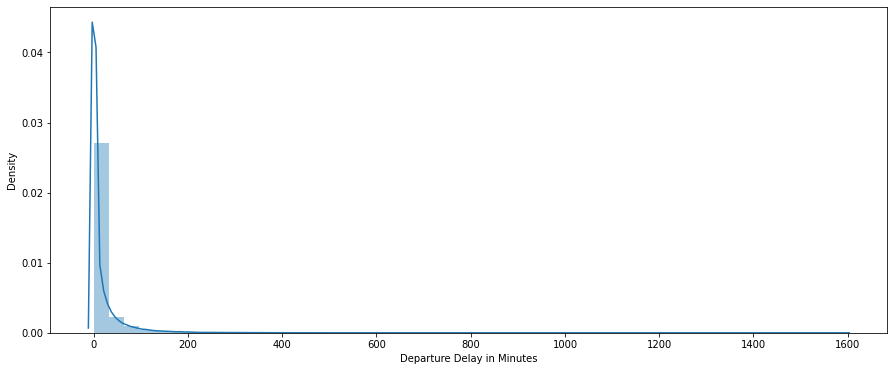

In [10]:
fig = plt.figure(figsize=(15,6))
sns.distplot(df['Departure Delay in Minutes']); 
plt.show()

<AxesSubplot:>

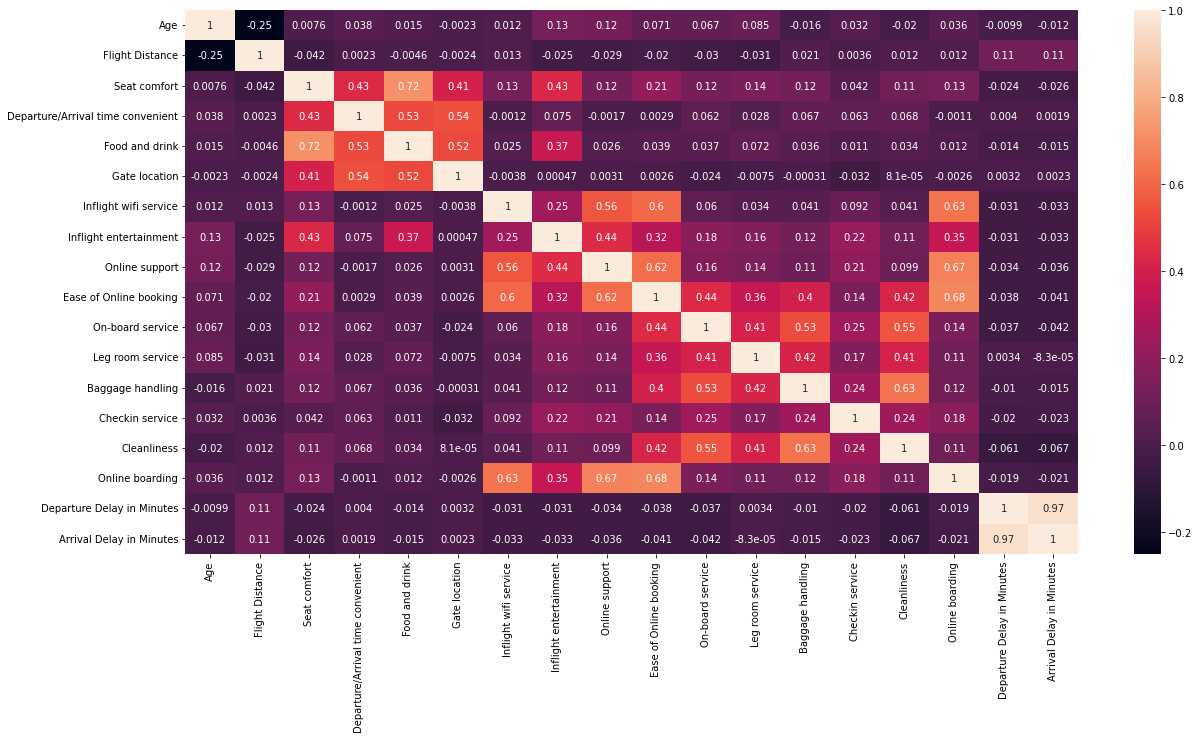

In [11]:
#heatmap
# increase size
plt.rcParams['figure.figsize'] = (20, 10)
sns.heatmap(df.corr(),annot=True)


The heat map shows us the correlation between our variables.
Only some variables have higher correlation and most of our variables less correlation. We also have some variables which has negative correlation.

<AxesSubplot:xlabel='Customer Type', ylabel='Age'>

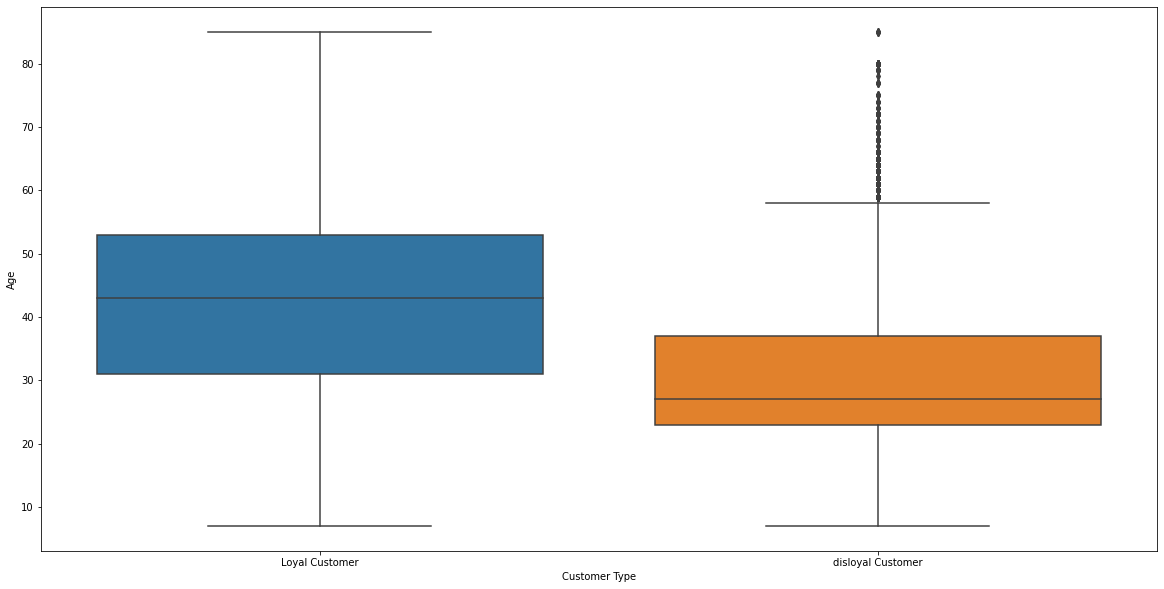

In [12]:
sns.boxplot(data = df, x='Customer Type', y='Age')

The boxplot tells us that we have significantly higher number of Loyal customers. The airline has more regular customers, which hints us that the customers like the airline service and are satisfied.

<AxesSubplot:xlabel='Class', ylabel='count'>

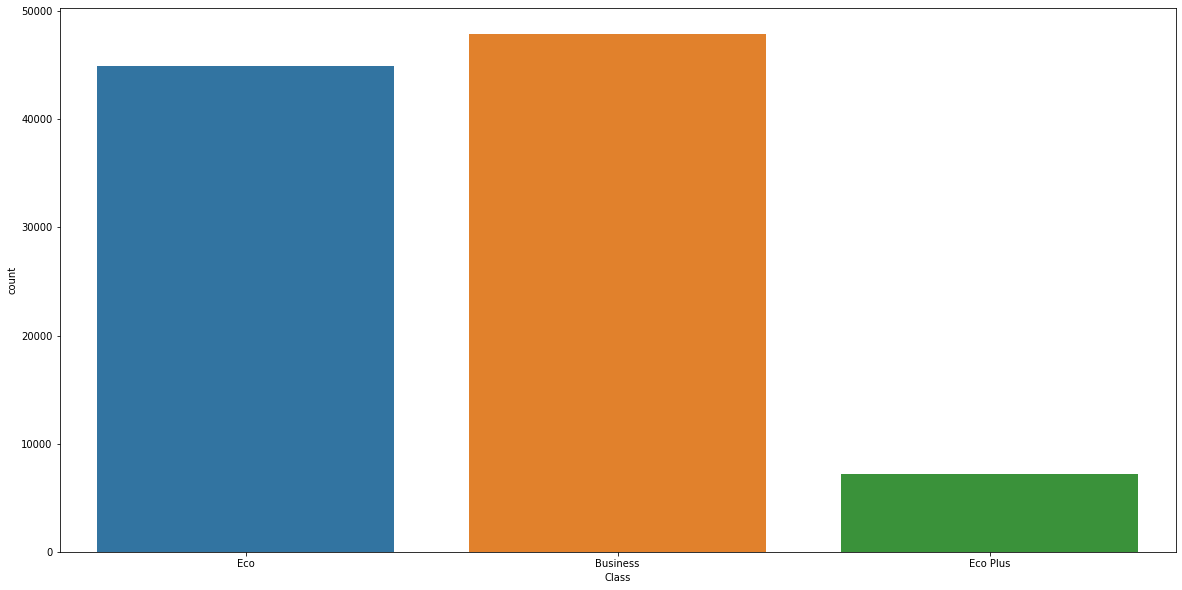

In [13]:
sns.countplot(data = df, x = 'Class')


Here we have three classes, most of the customers belong to the business and eco class. We have roughly higher number of business class people. 

<AxesSubplot:title={'center':'Gender'}, ylabel='Gender'>

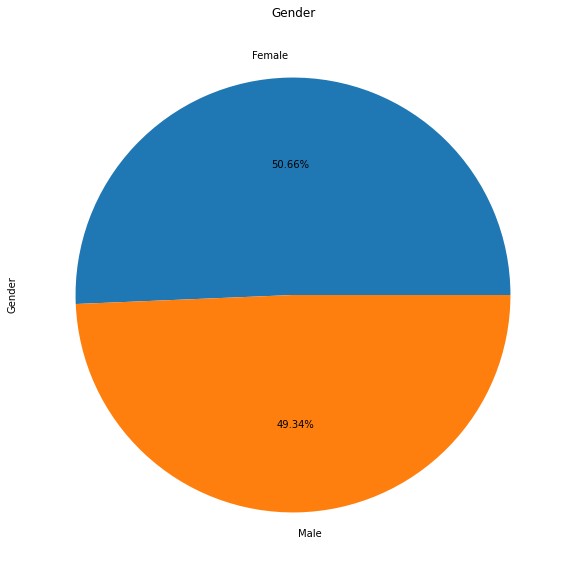

In [14]:

plt.figure(figsize=(10,10))
plt.title("Gender")
df["Gender"].value_counts().plot(kind="pie",autopct='%1.2f%%')

Our data is not gender biased, and we have approximately equal proportion.


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 24303 to 25405
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       100000 non-null  object 
 1   Gender                             100000 non-null  object 
 2   Customer Type                      100000 non-null  object 
 3   Age                                100000 non-null  int64  
 4   Type of Travel                     100000 non-null  object 
 5   Class                              100000 non-null  object 
 6   Flight Distance                    100000 non-null  int64  
 7   Seat comfort                       100000 non-null  int64  
 8   Departure/Arrival time convenient  100000 non-null  int64  
 9   Food and drink                     100000 non-null  int64  
 10  Gate location                      100000 non-null  int64  
 11  Inflight wifi service              1

This dataset is from Kaggle and it talks about the Customer's Airline satisfaction. We have satisfaction as our dependent variable and the other variables as independent variables.

In [16]:
# label encoding

col=df.columns
# for i in col:
#     if df[i].dtype=='object':
#         lbl=LabelEncoder()
#         fitting_encoding=lbl.fit(df[i])
#         df[i]=lbl.transform(df[i])
lbl=LabelEncoder()
df['satisfaction']=lbl.fit_transform(df['satisfaction'])
gen=lbl.fit(df['Gender'])
df['Gender']=gen.transform(df['Gender'])
cus=lbl.fit(df['Customer Type'])
df['Customer Type']=cus.transform(df['Customer Type'])
ty=lbl.fit(df['Type of Travel'])
df['Type of Travel']=ty.transform(df['Type of Travel'])
cla=lbl.fit(df['Class'])
df['Class']=cla.transform(df['Class'])


df_normal= df.sample(7000,random_state=10)
df_normal

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
120217,1,0,0,15,0,2,2303,5,4,4,...,5,5,5,3,3,2,4,5,1,7.0
54110,0,1,1,27,0,0,2229,3,3,3,...,2,2,4,1,3,3,3,2,0,0.0
14042,1,0,0,69,1,2,690,5,5,5,...,4,4,5,5,4,4,4,4,11,0.0
109758,1,0,0,38,0,0,1914,5,5,5,...,5,5,5,4,5,4,5,4,0,0.0
117121,1,0,0,45,0,0,2465,5,5,5,...,5,4,2,3,4,5,4,5,1,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99855,1,1,0,47,0,0,2891,1,1,1,...,5,4,4,4,4,4,4,4,0,0.0
66212,0,0,0,51,0,0,1124,1,3,3,...,3,1,1,1,1,4,1,4,2,6.0
87590,1,1,0,48,0,0,509,5,5,5,...,4,3,3,4,3,2,3,5,28,30.0
124487,1,0,0,36,0,0,207,2,2,2,...,4,5,5,5,5,5,5,4,54,36.0


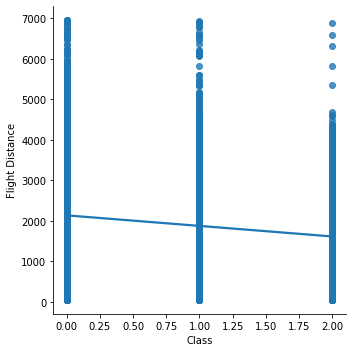

In [17]:
sns.lmplot(x="Class", y="Flight Distance", data=df)
plt.show()

As part of our preprocessing, we are going to use Min_max_scaler to scale the data.

In [18]:
from sklearn.preprocessing import MinMaxScaler

scaling = MinMaxScaler()
df = scaling.fit_transform(df)
df = pd.DataFrame(df, columns=col)





In [19]:
import numpy as np

def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)
clean_dataset(df)

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,0.0,1.0,0.0,0.538462,1.0,0.5,0.355166,0.6,0.8,0.4,...,1.0,1.0,0.8,0.8,0.75,0.6,0.8,1.0,0.000000,0.000000
1,1.0,1.0,1.0,0.384615,0.0,0.0,0.228083,0.8,0.8,0.8,...,0.4,0.4,0.8,0.8,0.75,1.0,0.8,0.4,0.007538,0.000631
2,1.0,0.0,0.0,0.461538,0.0,0.0,0.247066,0.0,0.0,0.0,...,0.4,0.2,0.2,0.2,0.00,1.0,0.2,0.2,0.000000,0.000000
3,0.0,1.0,0.0,0.512821,1.0,0.5,0.160267,0.2,0.6,0.2,...,0.6,0.6,1.0,0.6,0.50,1.0,0.2,0.6,0.009422,0.007576
4,1.0,1.0,0.0,0.628205,0.0,0.0,0.521664,0.4,0.8,0.4,...,0.6,1.0,1.0,1.0,1.00,0.2,1.0,1.0,0.010050,0.004419
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.0,0.0,0.0,0.230769,1.0,0.5,0.414867,0.4,0.6,0.6,...,0.4,0.4,0.8,0.8,1.00,0.6,0.4,0.4,0.023241,0.013258
99996,1.0,1.0,1.0,0.192308,0.0,0.0,0.261701,0.0,0.0,0.0,...,0.6,0.6,1.0,0.4,0.75,1.0,1.0,0.6,0.050879,0.059343
99997,1.0,1.0,0.0,0.602564,0.0,0.0,0.192581,0.8,0.8,0.8,...,1.0,1.0,1.0,1.0,1.00,1.0,1.0,1.0,0.028894,0.033460
99998,1.0,0.0,0.0,0.564103,0.0,0.0,0.077525,0.6,0.6,0.6,...,0.8,1.0,1.0,1.0,1.00,1.0,1.0,1.0,0.000000,0.000000


In [20]:
df.head()


,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,0.0,1.0,0.0,0.538462,1.0,0.5,0.355166,0.6,0.8,0.4,...,1.0,1.0,0.8,0.8,0.75,0.6,0.8,1.0,0.000000,0.000000
1,1.0,1.0,1.0,0.384615,0.0,0.0,0.228083,0.8,0.8,0.8,...,0.4,0.4,0.8,0.8,0.75,1.0,0.8,0.4,0.007538,0.000631
2,1.0,0.0,0.0,0.461538,0.0,0.0,0.247066,0.0,0.0,0.0,...,0.4,0.2,0.2,0.2,0.00,1.0,0.2,0.2,0.000000,0.000000
3,0.0,1.0,0.0,0.512821,1.0,0.5,0.160267,0.2,0.6,0.2,...,0.6,0.6,1.0,0.6,0.50,1.0,0.2,0.6,0.009422,0.007576
4,1.0,1.0,0.0,0.628205,0.0,0.0,0.521664,0.4,0.8,0.4,...,0.6,1.0,1.0,1.0,1.00,0.2,1.0,1.0,0.010050,0.004419


In [21]:
df_normal.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
120217,1,0,0,15,0,2,2303,5,4,4,...,5,5,5,3,3,2,4,5,1,7.0
54110,0,1,1,27,0,0,2229,3,3,3,...,2,2,4,1,3,3,3,2,0,0.0
14042,1,0,0,69,1,2,690,5,5,5,...,4,4,5,5,4,4,4,4,11,0.0
109758,1,0,0,38,0,0,1914,5,5,5,...,5,5,5,4,5,4,5,4,0,0.0
117121,1,0,0,45,0,0,2465,5,5,5,...,5,4,2,3,4,5,4,5,1,9.0


Splitting dataset into features and target

In [22]:
features=df.drop(['satisfaction'] , axis=1)
target = df.satisfaction

In [23]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=10)


we will use the Logistic regression and then we will find its accuracy

In [24]:
# logistic regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)


LogisticRegression()

In [25]:
# print accuracy
print('Accuracy of logistic regression classifier on training set:')
print(logreg.score(X_train, y_train))
classs=classification_report(y_train,logreg.predict(X_train))
print(classs)

Accuracy of logistic regression classifier on training set:
0.8373262645078091
              precision    recall  f1-score   support

         0.0       0.82      0.82      0.82     31656
         1.0       0.85      0.85      0.85     38134

    accuracy                           0.84     69790
   macro avg       0.84      0.84      0.84     69790
weighted avg       0.84      0.84      0.84     69790



Using Logistic Regression we are getting accuracy of 0.8